In [ ]:
# ---- Sales Analysis

# 1. Data wrangling

    # a. Data Loading: Load your sales data into a DataFrame using Pandas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import date


In [2]:
df = pd.read_csv('AusApparalSales4thQrt2020.csv')
df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [3]:
df.shape

(7560, 6)

In [4]:
df.columns

Index(['Date', 'Time', 'State', 'Group', 'Unit', 'Sales'], dtype='object')

In [ ]:
    #b. Data Cleaning: Identify missing or incorrect entries using isna() and notna() functions.
    
        #check for missing values
        #check for incorrect value

In [5]:
df.isna().sum() 

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [6]:
df.notna().sum() 

Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64

In [ ]:
 # Based on your findings, consider either dropping or filling missing values. You can use dropna() or fillna() for this.

  #sales_data_filled = sales_data.fillna(sales_data.mean()) 
  # Drop rows with missing values
  #sales_data_cleaned = sales_data.dropna()

In [ ]:
 # c. Data Normalization: Choose a suitable normalization method. Standardization (z-score normalization) is a common choice.     


In [7]:
data = df[['Unit','Sales']] 

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(data)
New_Data = scaler.transform(data)

In [9]:
New_Data

array([[0.0952381 , 0.0952381 ],
       [0.0952381 , 0.0952381 ],
       [0.03174603, 0.03174603],
       ...,
       [0.20634921, 0.20634921],
       [0.14285714, 0.14285714],
       [0.17460317, 0.17460317]])

In [10]:
data.head()

,Unit,Sales
0,8,20000
1,8,20000
2,4,10000
3,15,37500
4,3,7500


In [ ]:
 # d. GroupBy() Function: Utilize the GroupBy() function for data chunking or merging.

In [11]:
state_weekly_sales = pd.DataFrame(df.groupby('State')['Sales'].sum())
print("\n")
print("Weekly sales for each store: \n", state_weekly_sales)
print("\n")




Weekly sales for each store: 
            Sales
State           
 NSW    74970000
 NT     22580000
 QLD    33417500
 SA     58857500
 TAS    22760000
 VIC   105565000
 WA     22152500




In [ ]:
#------------------------------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# 2. Data analysis

    # a. Descriptive Statistical Analysis: Utilize techniques such as mean, median, mode, and standard deviation for the 'Sales' columns.

In [12]:
mean_sales = df['Sales'].mean()
median_sales = df['Sales'].median()
mode_sales = df['Sales'].mode()[0]
std_dev_sales = df['Sales'].std()   

print("\n1. Mean for the Sales:", mean_sales)
print("\n2. Median for the Sales:",median_sales)
print("\n3. Mode for the Sales:",mode_sales)
print("\n4. Standard Deviation for the Sales:",std_dev_sales)
print("\n")


1. Mean for the Sales: 45013.5582010582

2. Median for the Sales: 35000.0

3. Mode for the Sales: 22500

4. Standard Deviation for the Sales: 32253.506943966073




In [ ]:
    # b & c.  Identify the Group with the Highest and Lowest Sales: Find the group with the maximum and minimum sales.

In [13]:
highest_sales_data = df.loc[df['Sales'].idxmax()]
lowest_sales_data = df.loc[df['Sales'].idxmin()]

print("\nHighest Sales: \n", highest_sales_data)
print("                                        \n*************************************\n                                        ")
print("Lowest Sale: \n", lowest_sales_data)
print("\n")



Highest Sales: 
 Date     5-Dec-2020
Time        Evening
State           VIC
Group       Seniors
Unit             65
Sales        162500
Name: 5423, dtype: object
                                        
*************************************
                                        
Lowest Sale: 
 Date     1-Nov-2020
Time        Morning
State            NT
Group           Men
Unit              2
Sales          5000
Name: 2533, dtype: object




In [1]:
 # d. Generate Weekly, Monthly, and Quarterly Reports: Use Pandas to group the data by week, month, and quarter, and generate reports.
            # Weekly Report
            # monthly Report
            # Quarterly Report 

In [15]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [16]:
weekly_report = df.groupby(df['Date'].dt.to_period("W")).agg({'Sales' : 'mean','Unit' :'mean'})
print("\nWeekly Report: \n \n" ,weekly_report)
print("\n")



Weekly Report: 
 
                               Sales       Unit
Date                                          
2020-09-28/2020-10-04  44776.785714  17.910714
2020-10-05/2020-10-11  45922.619048  18.369048
2020-10-12/2020-10-18  45306.122449  18.122449
2020-10-19/2020-10-25  45603.741497  18.241497
2020-10-26/2020-11-01  43268.849206  17.307540
2020-11-02/2020-11-08  35484.693878  14.193878
2020-11-09/2020-11-15  36007.653061  14.403061
2020-11-16/2020-11-22  35905.612245  14.362245
2020-11-23/2020-11-29  36526.360544  14.610544
2020-11-30/2020-12-06  50378.401361  20.151361
2020-12-07/2020-12-13  53613.945578  21.445578
2020-12-14/2020-12-20  53835.034014  21.534014
2020-12-21/2020-12-27  54030.612245  21.612245
2020-12-28/2021-01-03  54732.142857  21.892857




In [17]:
monthly_report = df.groupby(df['Date'].dt.to_period("M")).agg({'Sales' : 'mean','Unit' :'mean'})
print("\nMonthly Report: \n \n" ,monthly_report)
print("\n")


Monthly Report: 
 
                 Sales       Unit
Date                            
2020-10  45353.174603  18.141270
2020-11  35985.119048  14.394048
2020-12  53702.380952  21.480952




In [18]:
quarterly_report = df.groupby(df['Date'].dt.to_period("Q")).agg({'Sales' : 'mean','Unit' :'mean'})
print("\nQuarterly Report: \n \n" ,quarterly_report)
print("\n")


Quarterly Report: 
 
                Sales       Unit
Date                           
2020Q4  45013.558201  18.005423




In [ ]:
#3. Data visualization
'''
        a. Use suitable data visualization libraries to construct a dashboard for the Head of Sales and Marketing (S&M). 
            The dashboard should encompass key parameters:
'''

In [ ]:
#State-wise Sales Analysis for Different Demographic Groups (Kids, Women, Men, and Seniors).


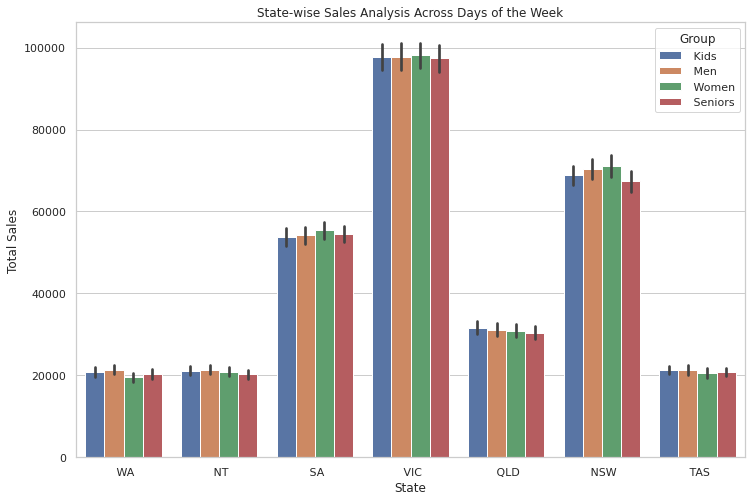

In [19]:
sns.set(style="whitegrid")
print("\n")

plt.figure(figsize=(12,8))
sns.barplot(x = 'State', y = 'Sales', hue = 'Group', data = df)
plt.title('State-wise Sales Analysis Across Days of the Week')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.legend(title='Group', loc = 'upper right')
plt.show()

print("\n")

In [ ]:
  #Group-wise Sales Analysis (Kids, Women, Men, and Seniors) Across Various States.
           

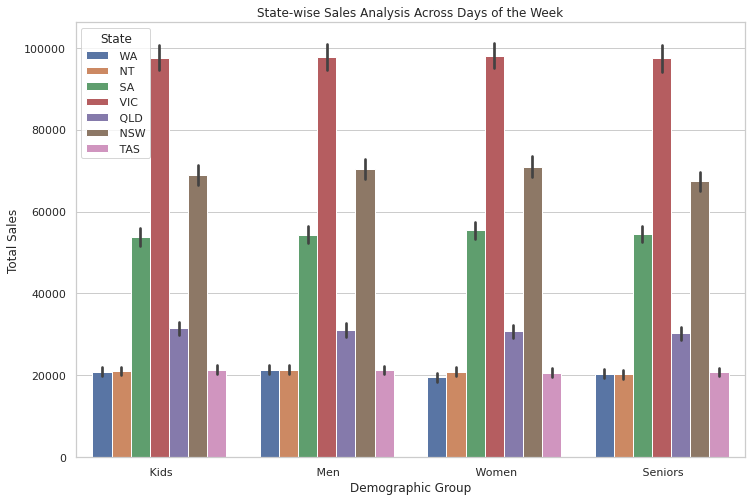

In [20]:
sns.set(style="whitegrid")
print("\n")

plt.figure(figsize=(12,8))
sns.barplot(x = 'Group', y = 'Sales', hue = 'State', data = df)
plt.title('State-wise Sales Analysis Across Days of the Week')
plt.xlabel('Demographic Group')
plt.ylabel('Total Sales')
plt.legend(title='State', loc = 'upper left')
plt.show()

print("\n")



In [ ]:
 #Time-of-the-Day Analysis: Identify peak and off-peak sales periods to facilitate strategic planning for S&M teams. 
    #This information aids in designing programs like hyperpersonalization and Next Best Offers to enhance sales.


In [21]:
time_sales = df.groupby('Time')['Sales'].sum().reset_index()

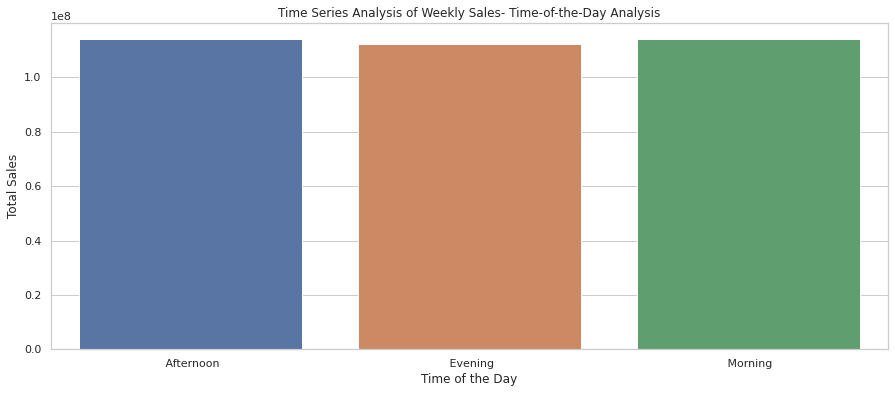

In [22]:
sns.set(style="whitegrid")

print("\n")

plt.figure(figsize=(15, 6))
sns.barplot(x='Time', y='Sales', data=time_sales)
plt.title('Time Series Analysis of Weekly Sales- Time-of-the-Day Analysis')
plt.xlabel('Time of the Day')
plt.ylabel('Total Sales')

plt.show()

print("\n")

In [ ]:

'''
        b. Ensure the visualization is clear and accessible for effective decision-making by the Head of S&M.
                #The dashboard must contain daily, weekly, monthly, and quarterly charts.
                #(Any visualization library can be used for this purpose. However, since statistical analysis is being done, Seaborn is preferred.)

'''

In [ ]:
#Daily Sales Analysis:

In [23]:
daily_sales = df.groupby('Date')['Sales'].sum()

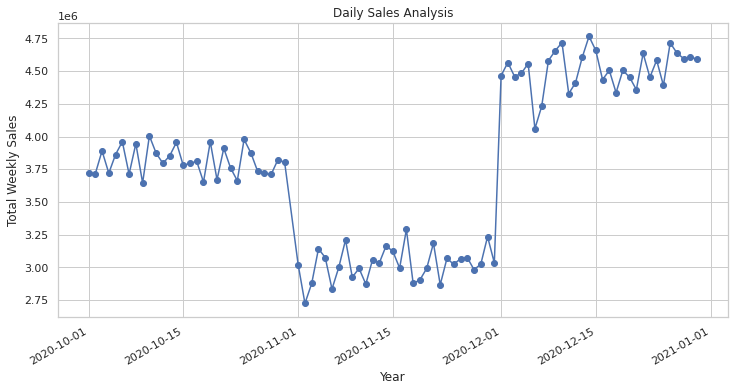

In [24]:
print("\n")

plt.figure(figsize=(12, 6))
daily_sales.plot(marker='o')
plt.title('Daily Sales Analysis')
plt.xlabel('Year')
plt.ylabel('Total Weekly Sales')
plt.show()

print("\n")

In [ ]:
#Weekly Sales Analysis:

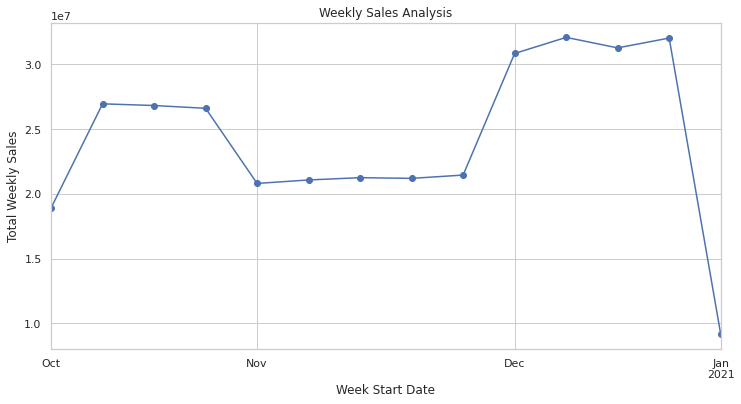

In [25]:
print("\n")

weekly_sales =df.resample('W-Mon', on='Date')['Sales'].sum()
plt.figure(figsize=(12, 6))
weekly_sales.plot(marker='o')
plt.title('Weekly Sales Analysis')
plt.xlabel('Week Start Date')
plt.ylabel('Total Weekly Sales')
plt.show()

print("\n")

In [ ]:
#Monthly Sales Analysis:

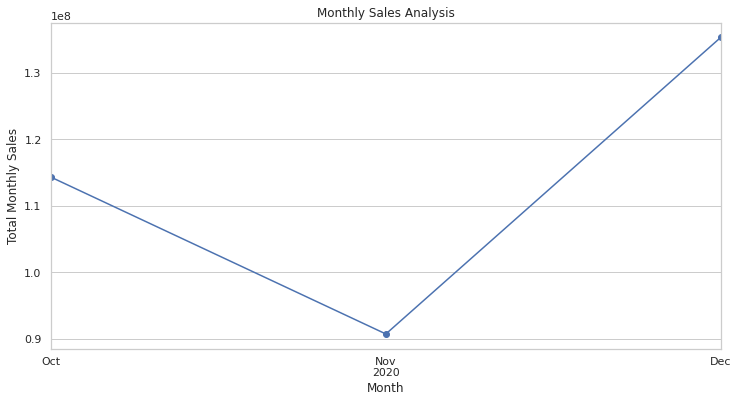

In [26]:
print("\n")

monthly_sales = df.resample('M', on='Date')['Sales'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(marker='o')
plt.title('Monthly Sales Analysis')
plt.xlabel('Month')
plt.ylabel('Total Monthly Sales')
plt.show()

print("\n")

In [ ]:
#Quarterly Sales Analysis:

In [31]:
df['Quarter'] = df['Date'].dt.to_period("Q")

In [33]:
quarterly_sales = df.groupby('Quarter')['Sales'].sum().reset_index()
quarterly_sales

,Quarter,Sales
0,2020Q4,340302500


<Figure size 864x432 with 0 Axes>

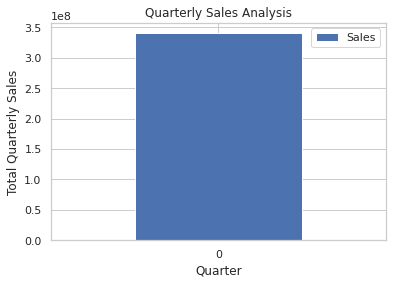

In [34]:
print("\n")


plt.figure(figsize=(12, 6))
quarterly_sales.plot(kind='bar', rot=0)
plt.title('Quarterly Sales Analysis')
plt.xlabel('Quarter')
plt.ylabel('Total Quarterly Sales')
plt.show()

print("\n")

In [ ]:
# Box plot showing the sales using descriptive Statistics

In [35]:
descriptive_stats = df.describe()

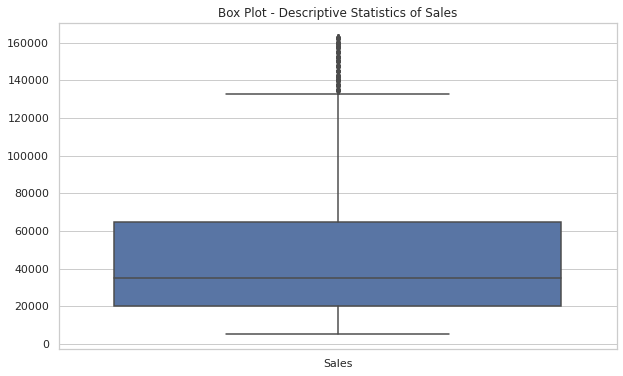

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Sales']])
plt.title('Box Plot - Descriptive Statistics of Sales')
plt.show()

In [ ]:
# Total Sales by state using grouoby()

In [39]:
total_sales_by_state = pd.DataFrame(df.groupby('State')['Sales'].sum())

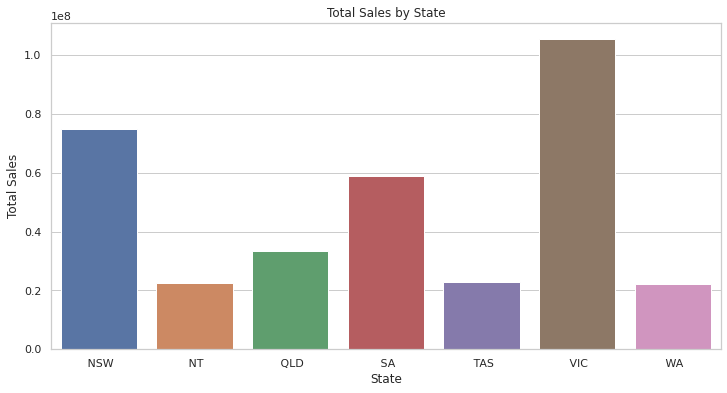

In [38]:
plt.figure(figsize=(12, 6))
sns.barplot(x=total_sales_by_state.index, y='Sales', data=total_sales_by_state)
plt.title('Total Sales by State')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.show()